<a href="https://colab.research.google.com/github/ishikagahane/TS-AI-Project/blob/main/Fake_News_Prediction_Final1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/mmk32001/New-Repository/blob/master/Fake_News_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

---



In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

### **Load Dataset**

---



In [ ]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [ ]:
print(fake.shape)
print(true.shape)

(23481, 4)
(21417, 4)


### **Data Preprocessing**

---



In [ ]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [ ]:
fake.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [ ]:
true.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [ ]:
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [ ]:
data.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [ ]:
data.head()

,title,text,subject,date,target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [ ]:
data.tail()

,title,text,subject,date,target
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",true


In [ ]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [ ]:
data.head()

,title,text,subject,date,target
0,PAM GELLER Rips Into Geraldo for Insults About...,Pam Geller is not the person you d ever want t...,politics,"Nov 1, 2017",fake
1,Timeline: Zika's origin and global spread,The following timeline charts the origin and s...,politicsNews,"September 12, 2016",true
2,Judge orders detention of Rio state congressme...,RIO DE JANEIRO (Reuters) - A judge in Brazil h...,worldnews,"November 14, 2017",true
3,BREAKING: SOUTH CAROLINA SENATE CAVES: VOTES T...,Another successful cleansing of our history ...,politics,"Jul 6, 2015",fake
4,Trump acknowledges thanks from UCLA players re...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"November 16, 2017",true


In [ ]:
# Removing the date 
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,PAM GELLER Rips Into Geraldo for Insults About...,Pam Geller is not the person you d ever want t...,politics,fake
1,Timeline: Zika's origin and global spread,The following timeline charts the origin and s...,politicsNews,true
2,Judge orders detention of Rio state congressme...,RIO DE JANEIRO (Reuters) - A judge in Brazil h...,worldnews,true
3,BREAKING: SOUTH CAROLINA SENATE CAVES: VOTES T...,Another successful cleansing of our history ...,politics,fake
4,Trump acknowledges thanks from UCLA players re...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,true


In [ ]:
# Removing the title
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,Pam Geller is not the person you d ever want t...,politics,fake
1,The following timeline charts the origin and s...,politicsNews,true
2,RIO DE JANEIRO (Reuters) - A judge in Brazil h...,worldnews,true
3,Another successful cleansing of our history ...,politics,fake
4,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,true


In [ ]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,pam geller is not the person you d ever want t...,politics,fake
1,the following timeline charts the origin and s...,politicsNews,true
2,rio de janeiro (reuters) - a judge in brazil h...,worldnews,true
3,another successful cleansing of our history ...,politics,fake
4,washington (reuters) - u.s. president donald t...,politicsNews,true


In [ ]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [ ]:
data.head()

,text,subject,target
0,pam geller is not the person you d ever want t...,politics,fake
1,the following timeline charts the origin and s...,politicsNews,true
2,rio de janeiro reuters a judge in brazil has ...,worldnews,true
3,another successful cleansing of our history ...,politics,fake
4,washington reuters us president donald trump ...,politicsNews,true


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data.head()

,text,subject,target
0,pam geller person ever want go debate cocky ge...,politics,fake
1,following timeline charts origin spread zika v...,politicsNews,true
2,rio de janeiro reuters judge brazil ordered de...,worldnews,true
3,another successful cleansing history like next...,politics,fake
4,washington reuters us president donald trump t...,politicsNews,true


In [ ]:
data.tail()

,text,subject,target
44893,someone going 18 lies wow,politics,fake
44894,gaza reuters red cross said monday israel duty...,worldnews,true
44895,nice threat potus intelligence community conti...,politics,fake
44896,reuters republican presidential nominee donald...,politicsNews,true
44897,brussels reuters european commission ask eu me...,worldnews,true


In [ ]:
def remove_numbers(text):
    clean_str = re.sub('[^a-zA-Z]',' ',text)
    return clean_str


data['text'] = data['text'].apply(remove_numbers)

In [ ]:
data.tail()

,text,subject,target
44893,someone going lies wow,politics,fake
44894,gaza reuters red cross said monday israel duty...,worldnews,true
44895,nice threat potus intelligence community conti...,politics,fake
44896,reuters republican presidential nominee donald...,politicsNews,true
44897,brussels reuters european commission ask eu me...,worldnews,true


### **Data Visualisation**

---



subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


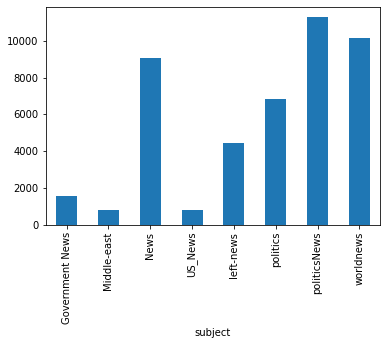

In [ ]:
# How many articles per subject?

print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


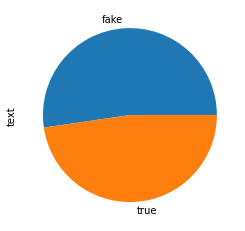

In [ ]:
# How many fake and real articles?

print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="pie")
plt.show()

In [ ]:
pip install wordcloud

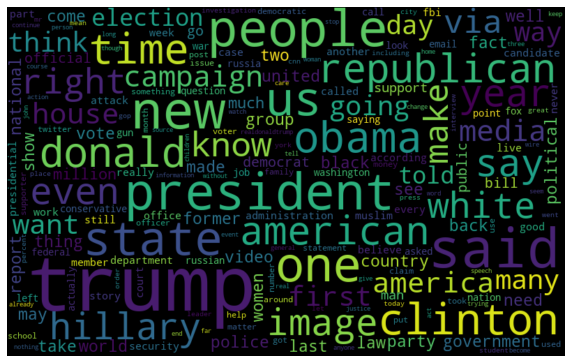

In [ ]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

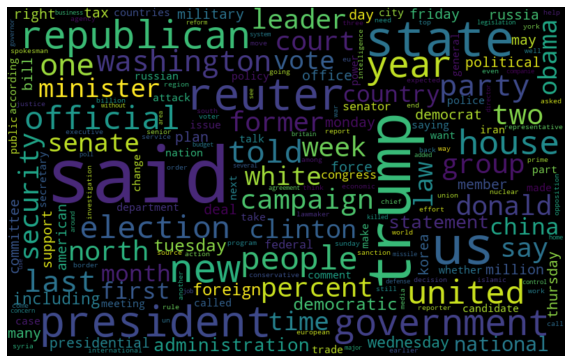

In [ ]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

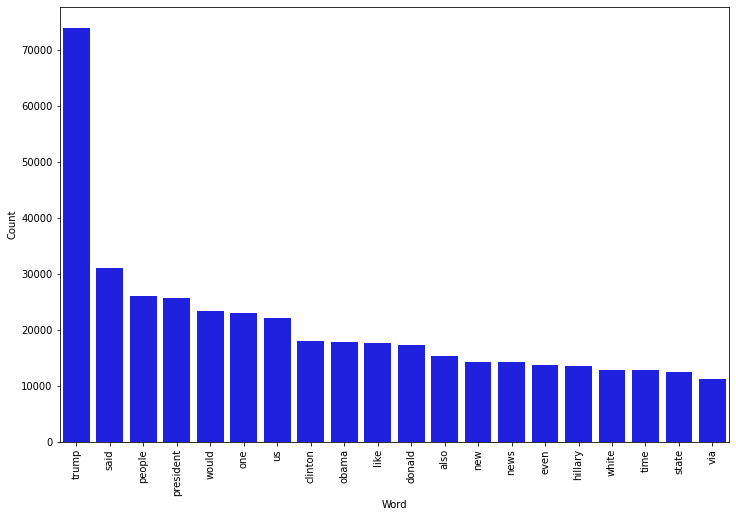

In [ ]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

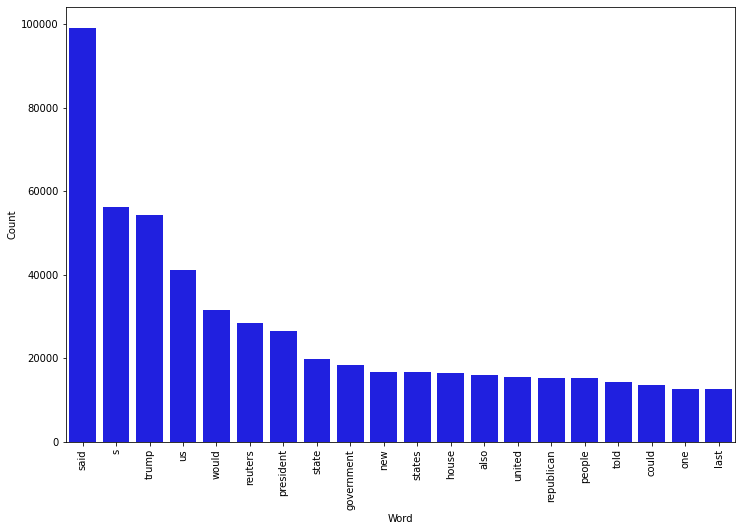

In [ ]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

In [ ]:
data['target'].unique()

array(['fake', 'true'], dtype=object)

In [ ]:
# Encoding true=1 and fake=0
from sklearn import preprocessing
 
label_encoder = preprocessing.LabelEncoder()
 
data['target']= label_encoder.fit_transform(data['target'])
 
data['target'].unique()

array([0, 1])

In [ ]:
targets=data.target
targets.head()

0    0
1    1
2    1
3    0
4    1
Name: target, dtype: int64

In [ ]:
data['target'].unique()

array([0, 1])

In [ ]:
print(data['target'])

0        0
1        1
2        1
3        0
4        1
        ..
44893    0
44894    1
44895    0
44896    1
44897    1
Name: target, Length: 44898, dtype: int64


### **Splitting Dataset**

---



In [ ]:
# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(data['text'], targets, test_size=0.4, random_state=7)

In [ ]:
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [ ]:
# Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

### **Logistic Regression**

---



In [ ]:
Logistic_model= LogisticRegression()

In [ ]:
Logistic_model.fit(tfidf_train,y_train)    

LogisticRegression()

In [ ]:
Logistic_predict = Logistic_model.predict(tfidf_test)
testing_data_accuracy = accuracy_score(Logistic_predict, y_test)
print("Logistic Regression Accuracy: {}%".format(round(testing_data_accuracy*100,2)))

Logistic Regression Accuracy: 98.13%


In [ ]:
print("Logistic Regression Precision: {}%".format(round(metrics.precision_score(Logistic_predict,y_test)*100,2)))

Logistic Regression Precision: 98.08%


In [ ]:
print("Logistic Regression Recall: {}%".format(round(metrics.recall_score(Logistic_predict,y_test)*100,2)))

Logistic Regression Recall: 98.01%


In [ ]:
print("Logistic Regression F1 Score: {}%".format(round(metrics.f1_score(y_test,Logistic_predict)*100,2)))

Logistic Regression F1 Score: 98.05%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

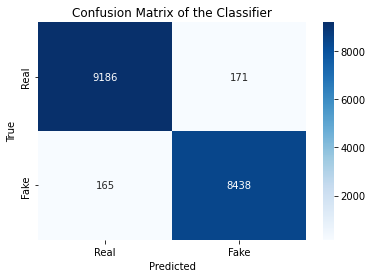

In [ ]:
cm = confusion_matrix(y_test,Logistic_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [ ]:
a = [['Accuracy', testing_data_accuracy*100], ['Precision', round(metrics.precision_score(Logistic_predict,y_test)*100,2)], ['Recall', round(metrics.recall_score(Logistic_predict,y_test)*100,2)], ['F1 score', round(metrics.f1_score(y_test,Logistic_predict)*100,2)]]
output = pd.DataFrame(a, columns = ['Performance', 'Value for 100%'])
output

,Performance,Value for 100%
0,Accuracy,98.129176
1,Precision,98.080000
2,Recall,98.010000
3,F1 score,98.050000


### **SVM**

---



In [ ]:
svm_model=svm.SVC(kernel="linear")
svm_model.fit(tfidf_train,y_train)


SVC(kernel='linear')

In [ ]:
svm_predict=svm_model.predict(tfidf_test)


In [ ]:
print("SVM(Linear) Accuracy: {}%".format(round(accuracy_score(y_test, svm_predict)*100,2)))

SVM(Linear) Accuracy: 99.3%


In [ ]:
print("SVM(Linear) Precision: {}%".format(round(metrics.precision_score(svm_predict,y_test)*100,2)))

SVM(Linear) Precision: 99.47%


In [ ]:
print("SVM(Linear) Recall: {}%".format(round(metrics.recall_score(svm_predict,y_test)*100,2)))

SVM(Linear) Recall: 99.07%


In [ ]:
print("SVM(Linear) F1 score: {}%".format(round(metrics.f1_score(y_test,svm_predict)*100,2)))

SVM(Linear) F1 score: 99.27%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

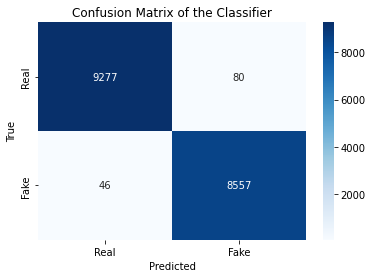

In [ ]:
cm = confusion_matrix(y_test,svm_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [ ]:
b = [['Accuracy', round(accuracy_score(y_test, svm_predict)*100,2)], ['Precision', round(metrics.precision_score(svm_predict,y_test)*100,2)], ['Recall', round(metrics.recall_score(svm_predict,y_test)*100,2)], ['F1 score', round(metrics.f1_score(y_test,svm_predict)*100,2)]]
output1 = pd.DataFrame(b, columns = ['Performance', 'Value for 100%'])
output1

,Performance,Value for 100%
0,Accuracy,99.30
1,Precision,99.47
2,Recall,99.07
3,F1 score,99.27


### **Passive Aggressive Classifier**

---



In [ ]:
# Initialize a PassiveAggressiveClassifier

pac_model=PassiveAggressiveClassifier(max_iter=50)
pac_model.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
# Predict on the test set and calculate accuracy

pac_predict=pac_model.predict(tfidf_test)
score=accuracy_score(y_test,pac_predict)
print("Passive Agressive Classifier Acccuracy: {}%".format(round(score*100,2)))

Passive Agressive Classifier Acccuracy: 99.36%


In [ ]:
print("Passive Agressive Classifier Precision: {}%".format(round(metrics.precision_score(pac_predict,y_test)*100,2)))

Passive Agressive Classifier Precision: 99.48%


In [ ]:
print("Passive Agressive Classifier Recall: {}%".format(round(metrics.recall_score(pac_predict,y_test)*100,2)))

Passive Agressive Classifier Recall: 99.19%


In [ ]:
print("Passive Agressive Classifier F1 Score: {}%".format(round(metrics.f1_score(y_test,pac_predict)*100,2)))

Passive Agressive Classifier F1 Score: 99.33%


In [ ]:
#Build confusion matrix
cm = confusion_matrix(y_test,pac_predict, labels=[0,1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

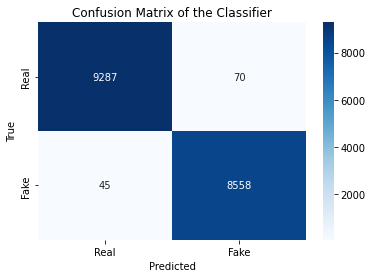

In [ ]:
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [ ]:
c = [['Accuracy', round(accuracy_score(y_test, pac_predict)*100,2)], ['Precision', round(metrics.precision_score(pac_predict,y_test)*100,2)], ['Recall', round(metrics.recall_score(pac_predict,y_test)*100,2)], ['F1 score', round(metrics.f1_score(y_test,pac_predict)*100,2)]]
output2 = pd.DataFrame(c, columns = ['Performance', 'Value for 100%'])
output2

,Performance,Value for 100%
0,Accuracy,99.36
1,Precision,99.48
2,Recall,99.19
3,F1 score,99.33


### **Decision Tree Classifier**

---



In [ ]:

# Vectorizing and applying TF-IDF
pipe =DecisionTreeClassifier(criterion= 'entropy',random_state=42)
# Fitting the model
dtc_model = pipe.fit(tfidf_train, y_train)

# Accuracy
dtc_predict = dtc_model.predict(tfidf_test)
print("Decision Tree Classifier Accuracy: {}%".format(round(accuracy_score(y_test, dtc_predict)*100,2)))

Decision Tree Classifier Accuracy: 99.33%


In [ ]:
print("Decision Tree Classifier Precision: {}%".format(round(metrics.precision_score(dtc_predict,y_test)*100,2)))

Decision Tree Classifier Precision: 99.09%


In [ ]:
print("Decision Tree Classifier Recall: {}%".format(round(metrics.recall_score(dtc_predict,y_test)*100,2)))

Decision Tree Classifier Recall: 99.51%


In [ ]:
print("Decision Tree Classifier F1 Score: {}%".format(round(metrics.f1_score(y_test,dtc_predict)*100,2)))

Decision Tree Classifier F1 Score: 99.3%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

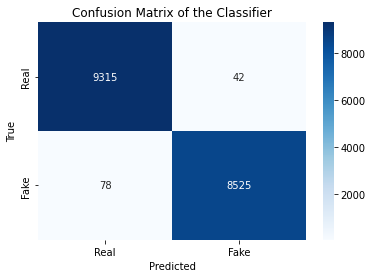

In [ ]:
cm = confusion_matrix(y_test, dtc_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [ ]:
d = [['Accuracy', round(accuracy_score(y_test, dtc_predict)*100,2)], ['Precision', round(metrics.precision_score(dtc_predict,y_test)*100,2)], ['Recall', round(metrics.recall_score(dtc_predict,y_test)*100,2)], ['F1 score', round(metrics.f1_score(y_test,dtc_predict)*100,2)]]
output3 = pd.DataFrame(d, columns = ['Performance', 'Value for 100%'])
output3

,Performance,Value for 100%
0,Accuracy,99.33
1,Precision,99.09
2,Recall,99.51
3,F1 score,99.30


### **Random Forest Classifier**

---



In [ ]:
rfc_model=RandomForestClassifier(max_features=10,n_estimators=100)
rfc_model.fit(tfidf_train,y_train)

RandomForestClassifier(max_features=10)

In [ ]:
rfc_predict = rfc_model.predict(tfidf_test)
print("Random Forest Classifier Accuracy: {}%".format(round(accuracy_score(y_test, rfc_predict)*100,2)))

Random Forest Classifier Accuracy: 96.46%


In [ ]:
print("Random Forest Classifier Precision: {}%".format(round(metrics.precision_score(rfc_predict,y_test)*100,2)))

Random Forest Classifier Precision: 97.04%


In [ ]:
print("Random Forest Classifier Recall: {}%".format(round(metrics.recall_score(rfc_predict,y_test)*100,2)))

Random Forest Classifier Recall: 95.65%


In [ ]:
print("Random Forest Classifier F1 Score: {}%".format(round(metrics.f1_score(y_test,rfc_predict)*100,2)))

Random Forest Classifier F1 Score: 96.34%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


[Text(0, 0.5, 'Real'), Text(0, 1.5, 'Fake')]

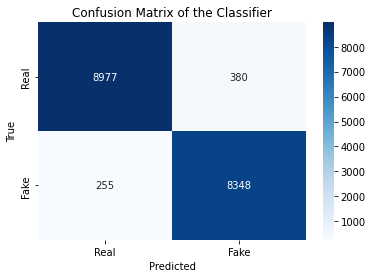

In [ ]:
cm = confusion_matrix(y_test, rfc_predict)
#plotting confusion matrix
sns.heatmap(cm, annot = True, cmap = 'Blues', fmt = 'd')
plt.title('Confusion Matrix of the Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

ax = plt.axes()
ax.set_xticklabels(["Real", "Fake"])
  

ax.set_yticklabels(["Real", "Fake"])

In [ ]:
e = [['Accuracy', round(accuracy_score(y_test, rfc_predict)*100,2)], ['Precision', round(metrics.precision_score(rfc_predict,y_test)*100,2)], ['Recall', round(metrics.recall_score(rfc_predict,y_test)*100,2)], ['F1 score', round(metrics.f1_score(y_test,rfc_predict)*100,2)]]
output4 = pd.DataFrame(e, columns = ['Performance', 'Value for 100%'])
output4

,Performance,Value for 100%
0,Accuracy,96.46
1,Precision,97.04
2,Recall,95.65
3,F1 score,96.34


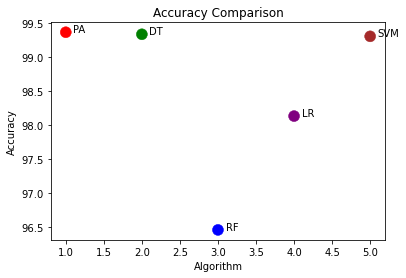

In [ ]:

left = [1, 2, 3, 4, 5]
annotations=['PA', 'DT', 'RF','LR','SVM']
height = [round(score*100,2), round(accuracy_score(y_test, dtc_predict)*100,2), round(accuracy_score(y_test, rfc_predict)*100,2),round(accuracy_score(y_test, Logistic_predict)*100,2),round(accuracy_score(y_test, svm_predict)*100,2)]
plt.scatter(left, height, color = ['red', 'green','blue','purple','brown'],linewidths = 0.5, s=120)
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
for i, label in enumerate(annotations):
    plt.annotate(label, (left[i]+0.1, height[i]))
 
plt.show()

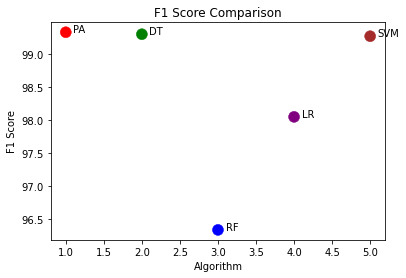

In [ ]:
left = [1, 2, 3, 4, 5]
annotations=['PA', 'DT', 'RF','LR','SVM']
height = [round(metrics.f1_score(y_test,pac_predict)*100,2),round(metrics.f1_score(y_test,dtc_predict)*100,2),round(metrics.f1_score(y_test,rfc_predict)*100,2),round(metrics.f1_score(y_test,Logistic_predict)*100,2),round(metrics.f1_score(y_test,svm_predict)*100,2)]
plt.scatter(left, height, color = ['red', 'green','blue','purple','brown'],linewidths = 0.5, s=120)
plt.xlabel('Algorithm')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')
for i, label in enumerate(annotations):
    plt.annotate(label, (left[i]+0.1, height[i]))
 
plt.show()

### **Take Input**

---



In [ ]:
print(y_test)

25168    1
5096     1
3123     0
37809    0
27507    1
        ..
9603     0
42809    0
820      1
37697    0
23394    0
Name: target, Length: 17960, dtype: int64


In [ ]:
i=int(input())
X_new = tfidf_test[i]
prediction = dtc_model.predict(X_new)
print(prediction)

if (prediction[0]==1):
  print('The news is Real')
else:
  print('The news is Fake')

4
[1]
The news is Real


In [ ]:

def testing(j):
  news = {"text":[j]}
  sample = pd.DataFrame(news)
  sample['text'] = sample['text'].apply(lambda x: x.lower())
  sample['text'] = sample['text'].apply(punctuation_removal)
  sample['text'] = sample['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  sample['text'] = sample['text'].apply(remove_numbers)
  sample1=sample["text"]
  sample2=tfidf_vectorizer.transform(sample1)
  return sample2




In [ ]:
def pred(samp):
  prediction = pac_model.predict(samp)
  print(prediction)

  if (prediction[0]==1):
    print('The news is Real')
  else:
    print('The news is Fake')

In [ ]:
j=input()
sampling=testing(j)
pred(sampling)

Trump is president of India
[0]
The news is Fake


In [ ]:
j=input()
sampling=testing(j)
pred(sampling)

Trump is President of United States
[1]
The news is Real
